In [6]:
import polars as pl
import numpy as np
import re

In [7]:
#path = "new_vcfs\HG001_merged_realigned_highconf.vcf"
path = "data/vcfs/HG001_merged_realigned_highconf_filtered_altcov_2.vcf"

In [8]:
with open(path, 'r') as vcf:
    rows_to_skip = 0
    for line in vcf:
        if line.startswith("#CHROM"):
            break
        rows_to_skip += 1

df = pl.read_csv(path, skip_rows = rows_to_skip, separator = "\t")

In [9]:
pattern = r"DP4=([0-9]+),([0-9]+),([0-9]+),([0-9]+)"

VAF_list = []
for line in df["INFO"]:
    match = re.search(pattern, line)
    alt = int(match.group(3)) + int(match.group(4))
    total = int(match.group(1)) + int(match.group(2)) + int(match.group(3)) + int(match.group(4))
    VAF = alt/total
    VAF_list.append(VAF)

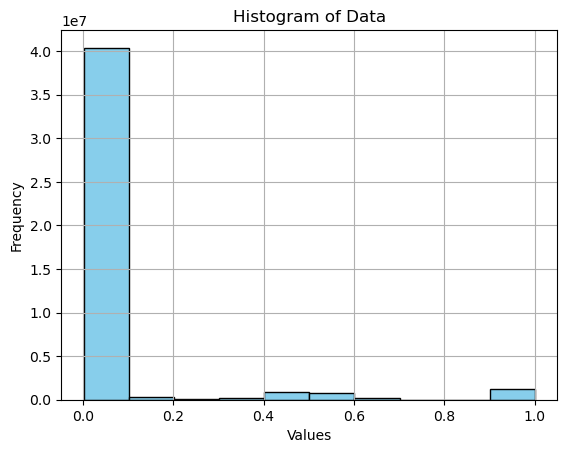

In [10]:
import matplotlib.pyplot as plt
plt.hist(VAF_list, bins=10, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.grid(True)
plt.show()